<a href="https://colab.research.google.com/github/AbhishekkumarDubey04/DElhi-Climate-Change-Perdiction/blob/main/Delhi_Climate_Change_Perdiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all required libraries and data set for the analysis.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv("DailyDelhiClimateTrain.csv")
print(data.head())
print(data.describe())
print(data.info())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 c

Let's dive into an insightful analysis by exploring the average temperature trends in Delhi over the years. This will give us a clearer understanding of how Delhi's climate has changed over time and allow us to spot any significant patterns or shifts in weather behavior.

In [23]:
figure = px.line(data, x="date", y="meantemp", title='Mean Temperature in Delhi Over the Years')
figure.show()

Now, let's take a closer look at the humidity levels in Delhi over the years. This analysis will help us uncover any trends or fluctuations in the city's atmospheric moisture, providing valuable insights into Delhi's changing climate patterns.

In [24]:
figure = px.line(data, x="date",  y="humidity",  title='Humidity in Delhi Over the Years')
figure.show()

Next, let's examine the wind speed in Delhi over the years. By analyzing the trends in wind patterns, we can gain deeper insights into how wind speeds have varied over time and how they may have influenced the city's weather dynamics.

In [25]:
figure = px.line(data, x="date",
                 y="wind_speed",
                 title='Wind Speed in Delhi Over the Years')
figure.show()

Up until 2015, wind speeds in Delhi were notably higher during the monsoon months (August and September) and the retreating monsoon season (December and January). However, after 2015, these anomalies disappeared, with wind speeds showing no unusual spikes during the monsoon periods. Now, let's shift our focus to the relationship between temperature and humidity to explore how these two critical factors have interacted over time in shaping Delhi's climate.

In [26]:
figure = px.scatter(data_frame = data, x="humidity",
                    y="meantemp", size="meantemp",
                    trendline="ols",
                    title = "Relationship Between Temperature and Humidity")
figure.show()

Based on the above graph we can easily delive that in Delhi, there is an inverse relationship between temperature and humidity. This indicates that as temperatures rise, humidity tends to decrease, while lower temperatures are associated with higher humidity levels.

Let's dive into the analysis of temperature changes in Delhi over the years. To begin, I will convert the Date column to a datetime format. Following this, I will add two new columns to the dataset: one for the year and another for the month.

In [27]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


Now, let's moniter the temperature changes in Delhi.

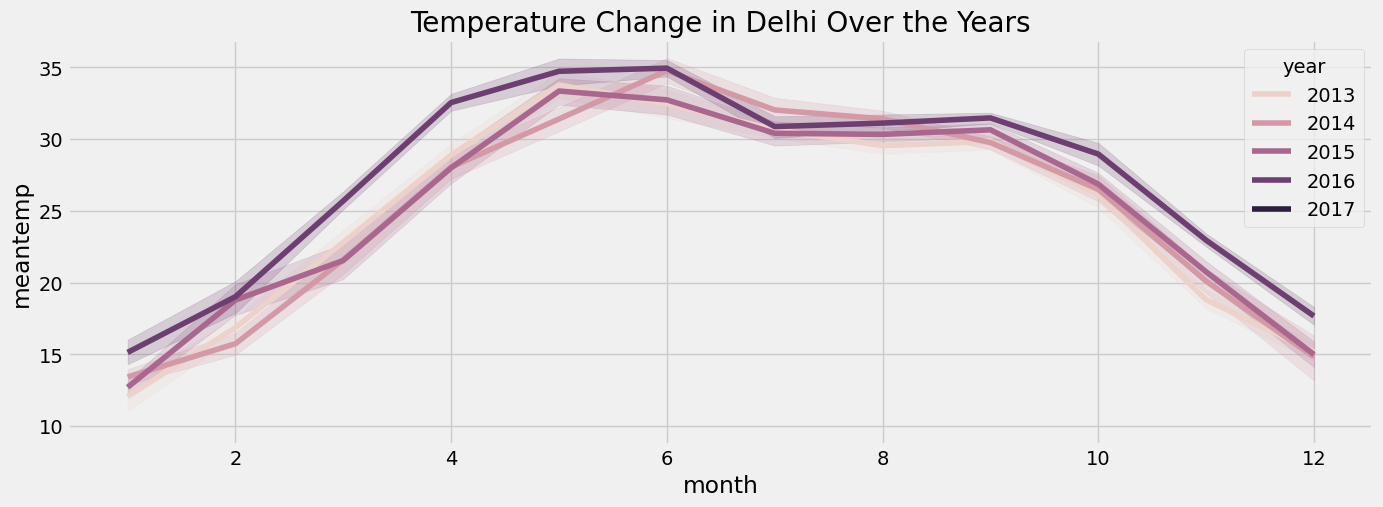

In [29]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 5))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='meantemp', hue='year')
plt.show()

While 2017 was not the hottest summer on record, we observe a consistent increase in the average temperature in Delhi each year.

Forecasting Weather using Python:
Now let’s move to the task of weather forecasting. I will be using the Facebook prophet model for this task. The Facebook prophet model is one of the best techniques for time series forecasting.
The prophet model accepts time data named as “ds”, and labels as “y”. So let’s convert the data into this format:

In [34]:
forecast_data = data.rename(columns = {"date": "ds",
                                       "meantemp": "y"})
print(forecast_data)

              ds          y    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]


Using Facebook prophet model

In [35]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi0vgi_j5/seh7yfb0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi0vgi_j5/c1m7e3r6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99723', 'data', 'file=/tmp/tmpi0vgi_j5/seh7yfb0.json', 'init=/tmp/tmpi0vgi_j5/c1m7e3r6.json', 'output', 'file=/tmp/tmpi0vgi_j5/prophet_model3l81ea5k/prophet_model-20240914060946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:09:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:09:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime 

Climate Predictions Upcoming year 2018, 2019, and 2020:

Based on these observations, we can make some tentative predictions:

* Continuation of Upward Trend: If the underlying trend continues, we might expect the measured value to be higher in 2018, 2019, and 2020 compared to earlier years.
* Seasonal Fluctuations: Seasonal variations are likely to persist. The exact timing and magnitude of peaks and troughs might vary, but the overall pattern is expected to remain similar.
* Potential for Outliers: Unusual weather events could lead to unexpected data points. It's important to be prepared for deviations from the predicted trend.
